# NLP - Word Embedding

- **Created by Andrés Segura Tinoco**
- **Created on June 09, 2019**
- **Updated on April 06, 2021**

**Word Embedding:** is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension. <a href='#link_one'>[1]</a>

**Gensim** is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community. <a href='#link_one'>[2]</a>

## Example with a document in English

In [1]:
# Load Python libraries
import io
import re
import pandas as pd
import random
import numpy as np
import timeit
from collections import Counter
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load NLP libraries from gensim and spacy
from gensim.models import Word2Vec
import spacy.lang.en as en

In [3]:
# Load Plot libraries
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Step 1 - Read natural text from a book

In [4]:
# Util function to read a plain text file
def read_text_file(file_path):
    text = ""
    with io.open(file_path, 'r', encoding='ISO-8859-1') as f:
        text = f.read()
    
    return text

In [5]:
# Get text sample
file_path = "../data/en/The Adventures of Sherlock Holmes - Arthur Conan Doyle.txt"
plain_text = read_text_file(file_path)
len(plain_text)

576467

In [6]:
# Show first 1000 characters of document
plain_text[:1000]

"\nProject Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: The Adventures of Sherlock Holmes\n\nAuthor: Arthur Conan Doyle\n\nRelease Date: November 29, 2002 [EBook #1661]\nLast Updated: May 20, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I.     A Scandal in Bohemia\n   II.    The Red-Headed League\n   III.   A Case of Identity\n   IV.    The Boscombe Valley Mystery\n   V.     The Five Orange Pips\n   VI.    The Man with the 

### Step 2 - Tokenize and remove Stopwords

**Data Quality process:** refers to the cleaning process of input data so they have meaning and value.

In [7]:
# Cleaing the text with RegEx
clean_text = plain_text.lower()
clean_text = clean_text.replace('\n', '.')
clean_text = re.sub('[^a-zA-Z.]', ' ', clean_text)
clean_text = re.sub(r'\s+', ' ', clean_text)
clean_text = re.sub(r'\.+', ".", clean_text)
clean_text[:1000]

'.project gutenberg s the adventures of sherlock holmes by arthur conan doyle.this ebook is for the use of anyone anywhere at no cost and with.almost no restrictions whatsoever. you may copy it give it away or.re use it under the terms of the project gutenberg license included.with this ebook or online at www.gutenberg.net.title the adventures of sherlock holmes.author arthur conan doyle.release date november ebook .last updated may .language english.character set encoding utf . start of this project gutenberg ebook the adventures of sherlock holmes .produced by an anonymous project gutenberg volunteer and jose menendez.cover.the adventures of sherlock holmes.by arthur conan doyle.contents. i. a scandal in bohemia. ii. the red headed league. iii. a case of identity. iv. the boscombe valley mystery. v. the five orange pips. vi. the man with the twisted lip. vii. the adventure of the blue carbuncle. viii. the adventure of the speckled band. ix. the adventure of the engineer s thumb. x. t

In [8]:
# Tokenize text in sentences
sentence_list = clean_text.split('.')
len(sentence_list)

14592

In [9]:
# Tokenize sentences in words
word_list = [sentence.split() for sentence in sentence_list if len(sentence.split()) > 0]
word_list[:10]

[['project',
  'gutenberg',
  's',
  'the',
  'adventures',
  'of',
  'sherlock',
  'holmes',
  'by',
  'arthur',
  'conan',
  'doyle'],
 ['this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with'],
 ['almost', 'no', 'restrictions', 'whatsoever'],
 ['you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or'],
 ['re',
  'use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included'],
 ['with', 'this', 'ebook', 'or', 'online', 'at', 'www'],
 ['gutenberg'],
 ['net'],
 ['title', 'the', 'adventures', 'of', 'sherlock', 'holmes'],
 ['author', 'arthur', 'conan', 'doyle']]

In [10]:
# Count the words in a document and return the most N repeated
def count_words(sentences, n):
    words = Counter()
    
    for sent in sentences:
        for word in sent:
            words[word] += 1
    
    return words.most_common(n)

In [11]:
# Get the most common words in the document
n_words = count_words(word_list, 50)
df = pd.DataFrame.from_records(n_words, columns=['word', 'quantity'])
df.head(10)

word  quantity
0   the      5636
1     i      3038
2   and      3020
3    to      2744
4    of      2661
5     a      2643
6    in      1766
7  that      1752
8    it      1737
9   you      1503

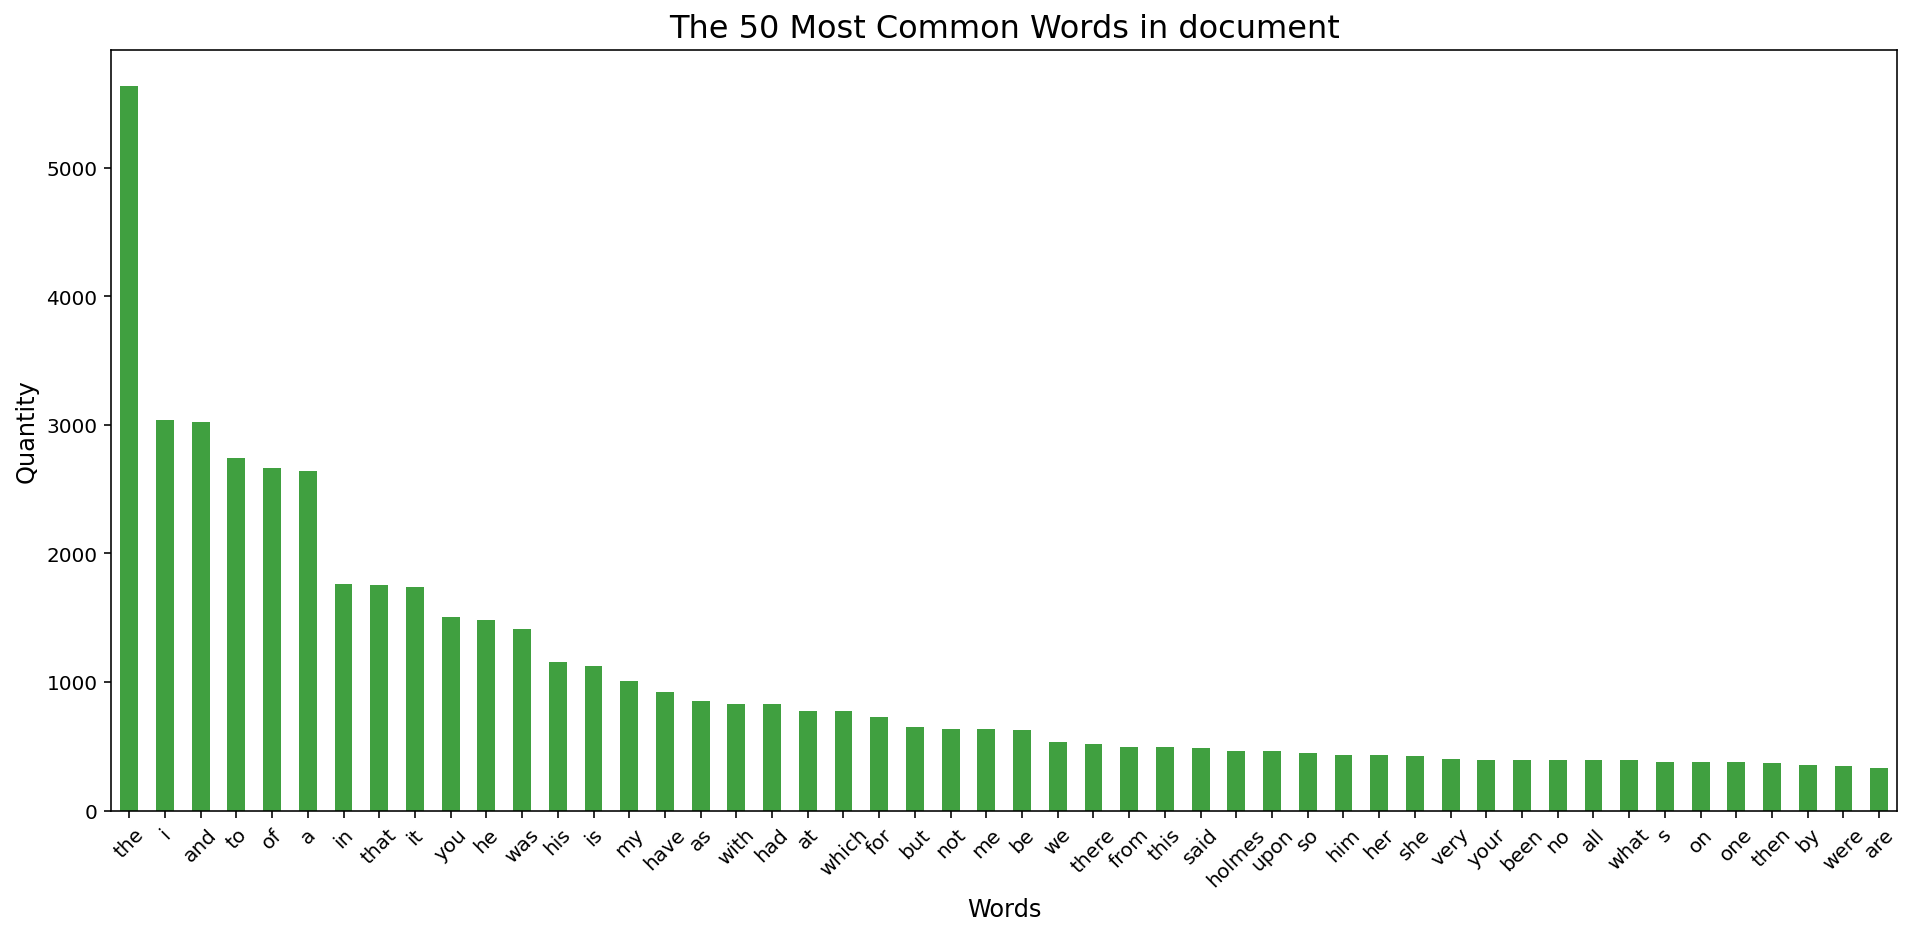

In [12]:
# Plot the most common words in the document
fig, ax = plt.subplots()
df.plot.bar(ax=ax, x="word", y="quantity", color="green", alpha=0.75, figsize=(16, 7))
ax.get_legend().remove()
plt.xticks(rotation=45)
plt.title("The 50 Most Common Words in document", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.show()

**- Stopwords:** refers to the most common words in a language, which do not significantly affect the meaning of the text.

In [13]:
# Get English stopwords
stopwords_en = en.stop_words.STOP_WORDS
print(stopwords_en)

{'neither', 'only', 'can', 'must', 'to', 'formerly', 'your', 'whereas', 'them', 'such', 'about', 'we', 'whoever', 'before', 'wherever', 'n‘t', 'nothing', 'did', 'thereby', 'afterwards', 'will', 'as', 'down', 'where', 'below', 'that', 'amongst', 'the', 'beside', 'anything', 'does', 'seem', '‘s', 'unless', 'seems', 'less', 'whom', 'being', 'whereupon', 'after', 'cannot', 'so', 'side', 'else', 'among', 'here', "n't", 'ca', 'thus', 'since', 'her', 'hereby', 'off', 'had', 'my', 'hence', 'whether', 'into', 'anyway', 'once', 'sometimes', 'along', 'same', 'very', 'against', 'i', 'whereafter', 'our', 'what', '’s', 'various', 'ours', 'whither', 'front', 'everywhere', 'third', 'in', 'a', 'forty', 'would', 'top', 'noone', 'at', 'me', 'eleven', 'four', 'hereupon', 'again', 'see', 'nobody', '’d', 'nevertheless', 'indeed', 'behind', 'alone', 'yourself', 'which', 'make', 'and', 'hereafter', 'it', 'were', 'thereafter', 'but', 'hers', 'anywhere', 'everyone', 'however', 'still', 'could', 'mostly', 'she',

In [14]:
# Remove stopwords
all_words = []
for ix in range(len(word_list)):
    all_words.append([word for word in word_list[ix] if (word not in stopwords_en and len(word) > 2)])

all_words[:10]

[['project',
  'gutenberg',
  'adventures',
  'sherlock',
  'holmes',
  'arthur',
  'conan',
  'doyle'],
 ['ebook', 'use', 'cost'],
 ['restrictions', 'whatsoever'],
 ['copy', 'away'],
 ['use', 'terms', 'project', 'gutenberg', 'license', 'included'],
 ['ebook', 'online', 'www'],
 ['gutenberg'],
 ['net'],
 ['title', 'adventures', 'sherlock', 'holmes'],
 ['author', 'arthur', 'conan', 'doyle']]

In [15]:
# Get the most common words in the document after removing the stopwords
n_words = count_words(all_words, 50)
df = pd.DataFrame.from_records(n_words, columns = ['word', 'quantity'])
df.head(10)

word  quantity
0    said       486
1  holmes       465
2     man       305
3  little       269
4   think       174
5    room       171
6    know       170
7   shall       169
8    come       161
9    time       151

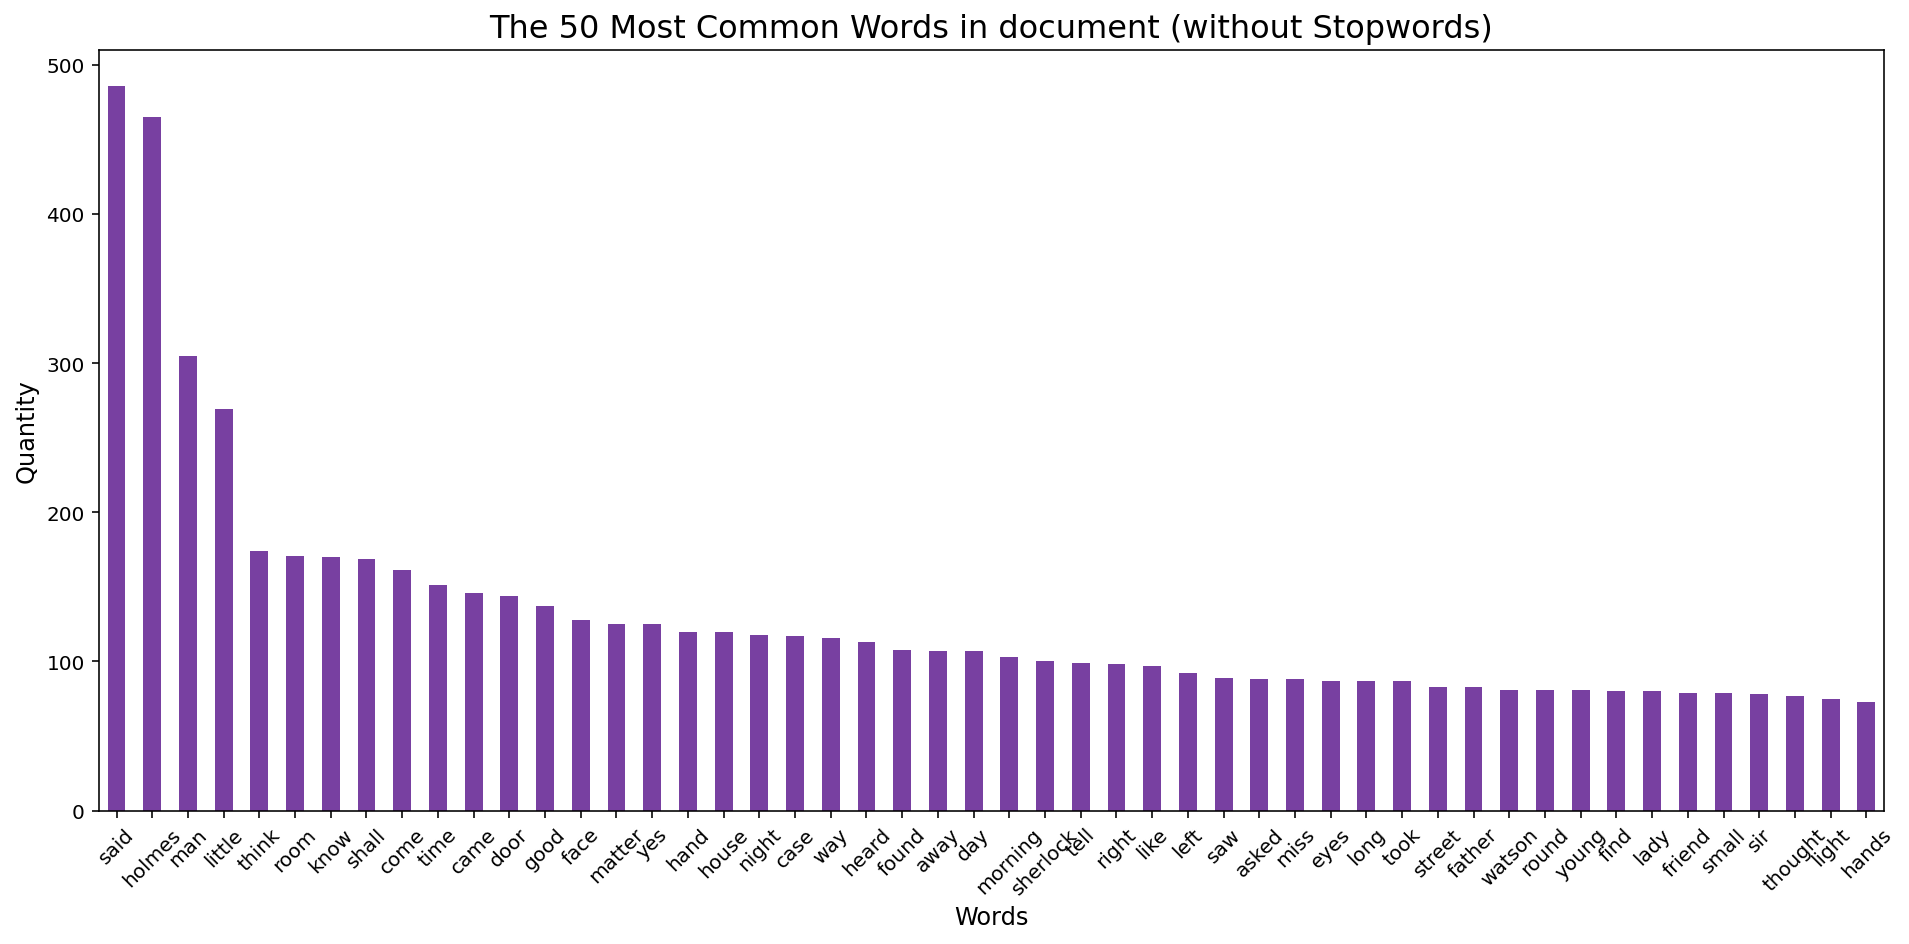

In [16]:
# Plot the most common words in the document after removing the stopwords
fig, ax = plt.subplots()
df.plot.bar(ax=ax, x="word", y="quantity", color="indigo", alpha=0.75, figsize=(16, 7))
ax.get_legend().remove()
plt.xticks(rotation=45)
plt.title("The 50 Most Common Words in document (without Stopwords)", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.show()

In [17]:
# Reconstructing the clean text (without stop-words)
new_clean_text = ''
for sent in all_words:
    for word in sent:
        new_clean_text = new_clean_text + word + ' '

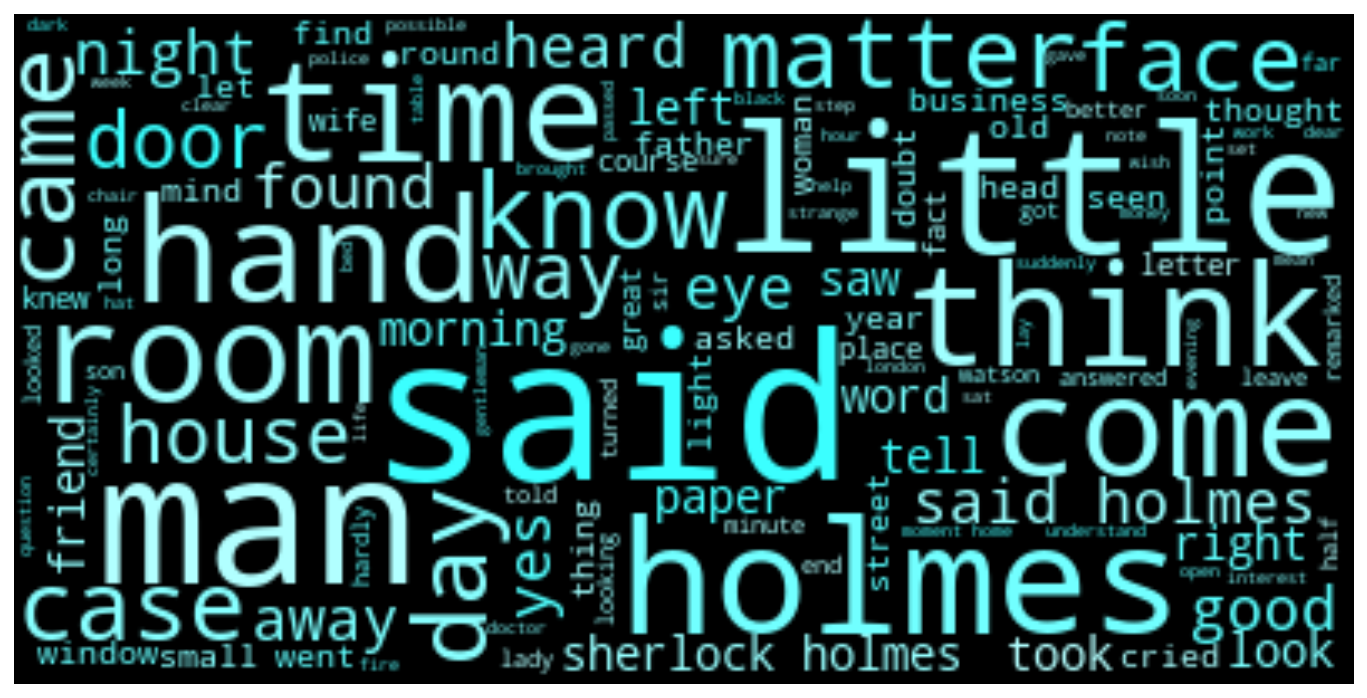

In [18]:
# Custom color function
def color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return "hsl(45, 150%%, %d%%)" % random.randint(160, 255)

# Create a Word cloud
wc = WordCloud(max_font_size=60, min_font_size=5, max_words=150, background_color="black", margin=2)
wc = wc.generate(new_clean_text)

# Plot a Word cloud
plt.figure(figsize = (12, 12))
plt.imshow(wc.recolor(color_func = color_func, random_state=3), interpolation = "bilinear")
plt.axis("off")
plt.show()

### Step 3 - Create a Word2Vec model

**- Word2Vec** consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer. Word2Vec utilizes two architectures: CBOW (Continuous Bag of Words) and Skip Gram. <a href='#link_three' target='_blank'>[3]</a>

In [19]:
# Algorithm params
min_count = 3    # Minimium frequency count of words. The model would ignore words that do not satisfy the min_count
size = 150       # The size of the dense vector to represent each token or word
window = 5       # The maximum distance between the target word and its neighboring word
sg = 0           # Skip Gram algorithm = False. Continuous Bag of Words = True
epochs = 10        # Number of iterations (epochs) over the corpus

In [20]:
# Create Word2Vec model
w2v_model = Word2Vec(all_words, min_count=min_count, size=size, window=window, sg=sg, iter=epochs)

**- Vocabulary:** unique words of the document.

In [21]:
# Show vocabulary size: unique words occurring at least twice
vocabulary = w2v_model.wv.vocab
len(vocabulary)

2841

In [22]:
# Show 'holmes' vector
w2v_model.wv['holmes']

array([-0.23807047,  0.26477346,  0.08149273, -0.30108932,  0.06984089,
        0.02401427, -0.02754712, -0.21973525,  0.04582647, -0.08860961,
        0.02872347, -0.07190326, -0.2530971 ,  0.04033757, -0.4764795 ,
        0.2162806 ,  0.00790394, -0.4869322 ,  0.08642276,  0.09914321,
        0.02781172,  0.21489762,  0.13405289, -0.25053158, -0.24227643,
        0.4032849 ,  0.38471982,  0.11121051,  0.12291566,  0.18623774,
       -0.60306084, -0.328302  , -0.28426677, -0.03342326,  0.05872174,
       -0.15090671,  0.01665076, -0.2268708 , -0.22943644,  0.01213198,
       -0.01130757, -0.695897  ,  0.06685145, -0.09028937, -0.14128715,
       -0.11041557,  0.2540436 ,  0.4307933 ,  0.17265049,  0.3529423 ,
        0.24795836,  0.54278356,  0.0134762 ,  0.2924691 , -0.11372741,
        0.09825439, -0.2357802 ,  0.5086166 , -0.43401104,  0.7156987 ,
        0.0087189 , -0.2658789 , -0.24683659, -0.28850073,  0.18426439,
        0.23244132, -0.29310367,  0.1394347 , -0.00246636,  0.11

**- Similar Words:** Words more similar in terms of meaning and context.

In [23]:
# Finding Positive Similar Words
w2v_model.wv.most_similar(positive=['holmes'], topn=10)

[('sat', 0.9997342824935913),
 ('friend', 0.9997245669364929),
 ('like', 0.9997104406356812),
 ('found', 0.9997096061706543),
 ('heard', 0.9997071027755737),
 ('case', 0.9997058510780334),
 ('took', 0.9997023940086365),
 ('wife', 0.9997011423110962),
 ('right', 0.9996963143348694),
 ('face', 0.9996955394744873)]

In [24]:
# Finding Negative Similar Words
w2v_model.wv.most_similar(negative=['holmes'], topn=10)

[('awkward', 0.6305853128433228),
 ('cruelly', 0.39079976081848145),
 ('iii', 0.1528523862361908),
 ('faithfully', -0.017003118991851807),
 ('murdered', -0.32345420122146606),
 ('stolen', -0.5577788949012756),
 ('useless', -0.7638463973999023),
 ('instructive', -0.8432079553604126),
 ('choose', -0.8444396257400513),
 ('governess', -0.8452680110931396)]

In [25]:
# Calculate the similarity between 2 words
w2v_model.wv.similarity(w1='holmes', w2='watson')

0.99969494

In [26]:
# Calculate similarity: sim(w1, w2) = sim(w2, w1)
w2v_model.wv.similarity(w1='watson', w2='holmes')

0.99969494

In [27]:
# Show word that doesn't belong to the list
w2v_model.wv.doesnt_match(['holmes', 'watson', 'mycroft'])

'holmes'

## Step 4 - Plot similars words

In [28]:
# Get vectors
target_word = 'sherlock'
top_n = 25

# Calculate more and less similars words
most_similar = w2v_model.wv.most_similar(positive = [target_word], topn = top_n)
less_similar = w2v_model.wv.most_similar(negative = [target_word], topn = top_n)

# Save them
neighbors = [(target_word, 1, 'current')]
neighbors += [(*row, 'most') for row in most_similar]
neighbors += [(*row, 'less') for row in less_similar]

# Get neighbors vectos
neigh_word = [row[0] for row in neighbors]
X = w2v_model[neigh_word]
len(X)

51

In [29]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# The explained variance of each principal components
list(pca.explained_variance_ratio_)

[0.99953187, 6.170763e-05]

In [30]:
# Create and show principal components DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=["PC1", "PC2"])
pca_df['Name'] = neigh_word
pca_df.head(10)

PC1       PC2      Name
0  0.466697  0.062090  sherlock
1  2.047420  0.024883      said
2  0.977227  0.008796     asked
3  0.707298  0.001039     table
4  0.682319  0.001789  remarked
5  0.750469  0.001408       sat
6  1.857339 -0.004857     round
7  1.166201 -0.001944    father
8  0.337309  0.001724      coat
9  1.310410 -0.003488     chair

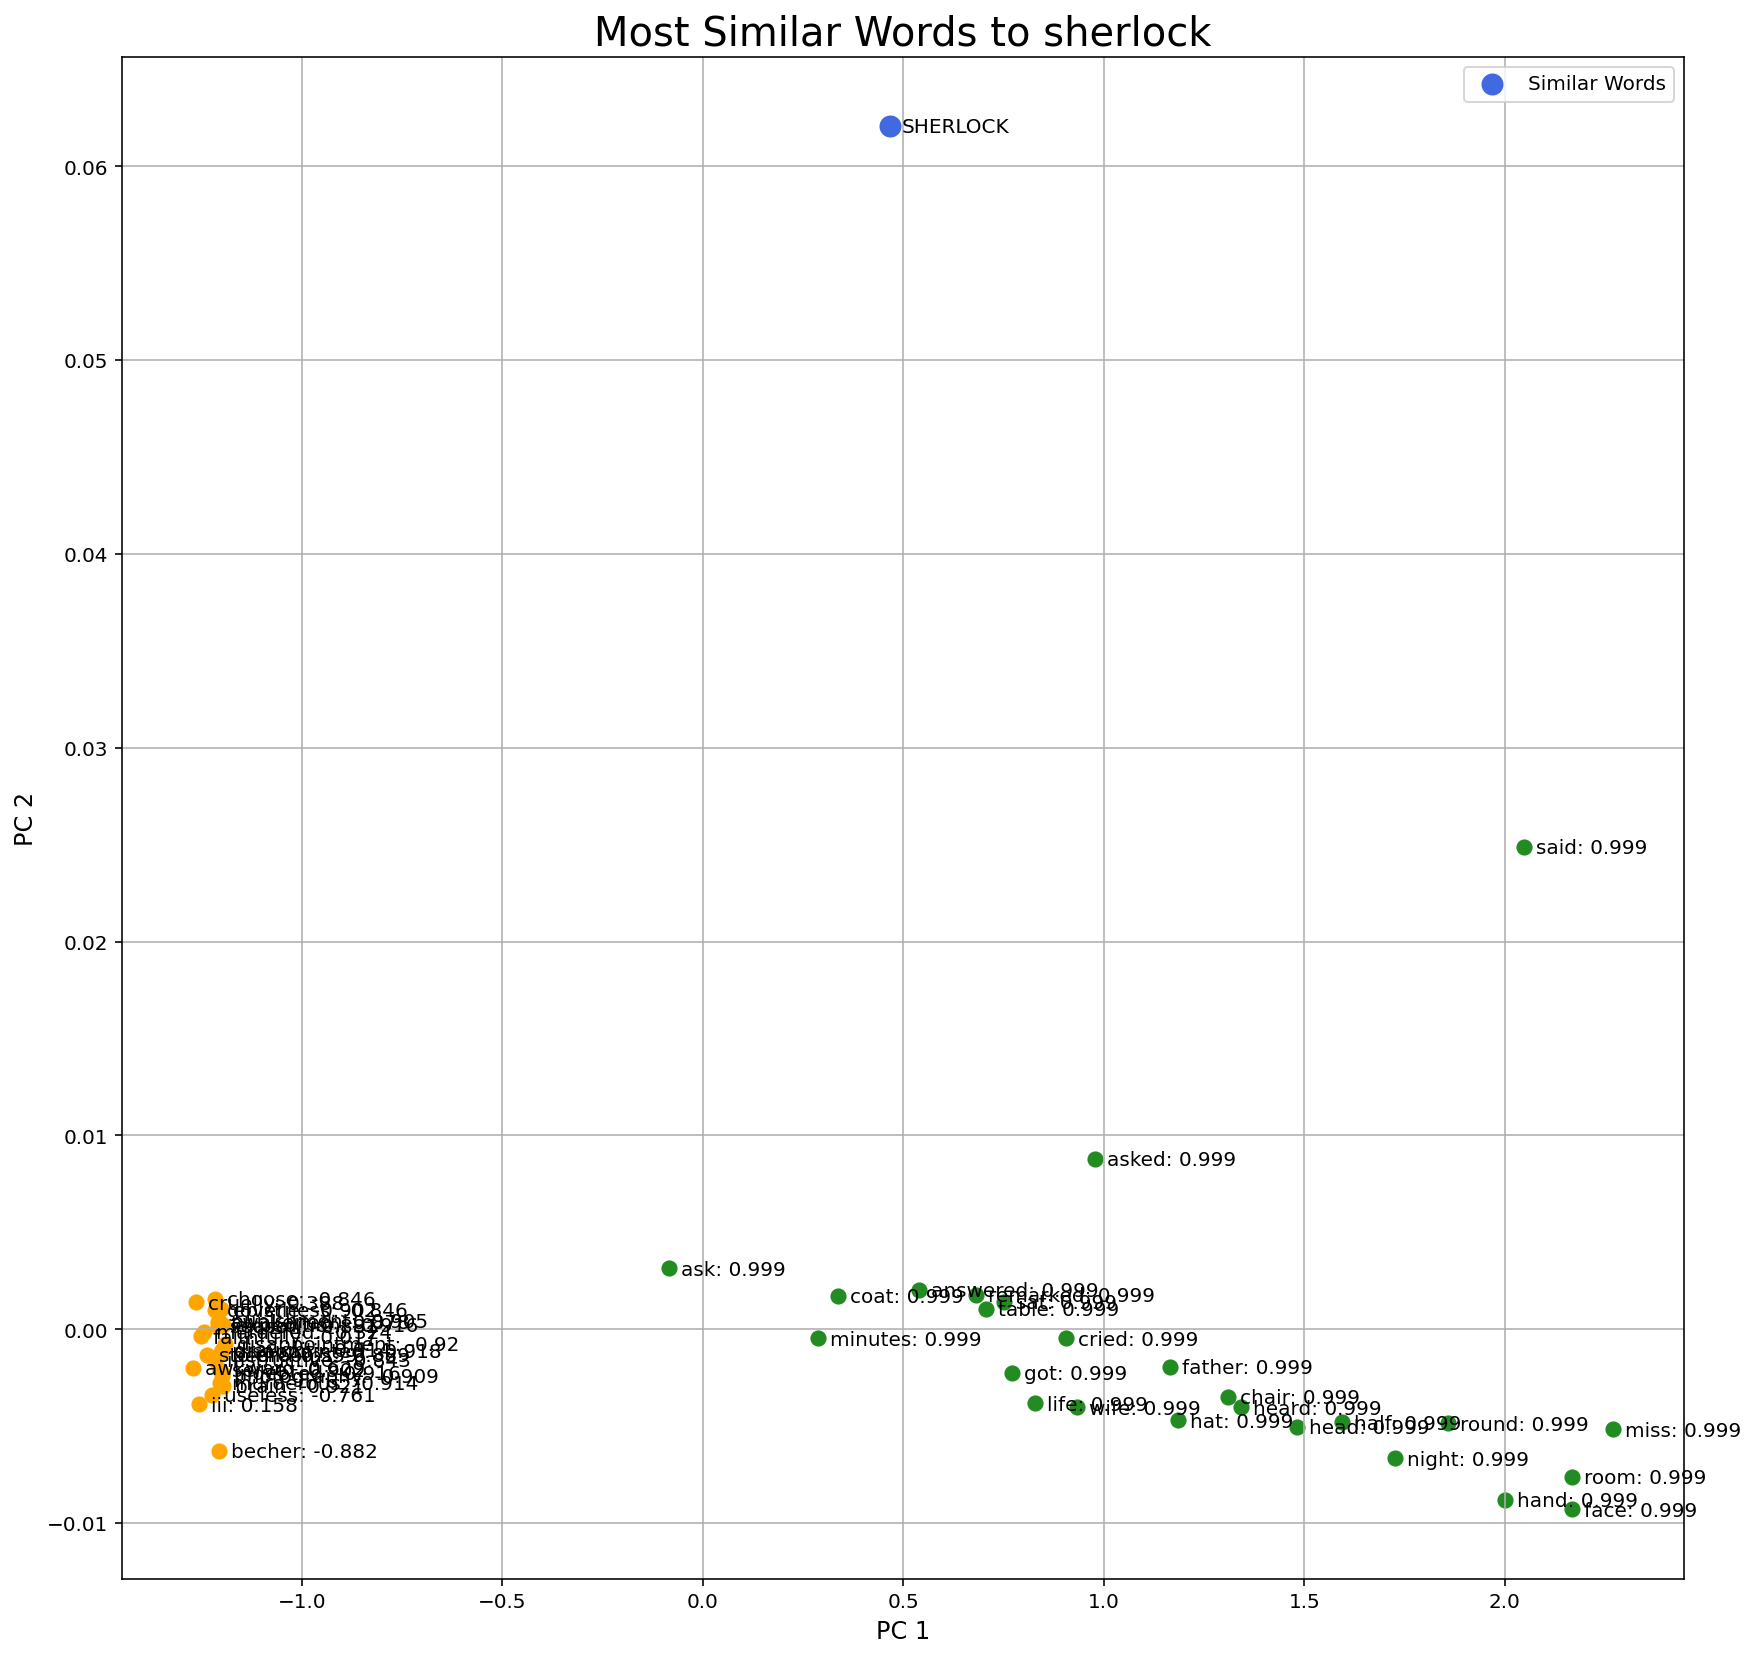

In [31]:
# Create a scatter plot of the projection
fig, ax = plt.subplots(figsize = (14, 14))
gap = 0.001
colors = dict()
colors['current'] = 'royalblue'
colors['most'] = 'forestgreen'
colors['less'] = 'orange'

# Add points one by one with a loop
for i, word in enumerate(neigh_word):
    node_col = colors[neighbors[i][2]]
    
    if word == target_word:
        node_size = 100
        text = word.upper()
    else:
        node_size = 50
        text = word + ': ' + str(round(neighbors[i][1], 3))
        
    plt.scatter(pca_data[i, 0], pca_data[i, 1], c = node_col, s = node_size)
    plt.annotate(text, xy = (pca_data[i, 0] + gap*30, pca_data[i, 1] - gap/3))

# Plot setup
ax.set_xlabel("PC 1", fontsize=12)
ax.set_ylabel("PC 2", fontsize=12)
ax.set_title("Most Similar Words to " + target_word, fontsize=20)
ax.legend(["Similar Words"])
ax.grid()

## Step 5 - Export similarity between the Words

In [32]:
# Create Word2Vec model
w2v_model = Word2Vec(all_words, min_count=5, size=100, window=5, sg=0)
vocabulary = w2v_model.wv.vocab
len(vocabulary)

1780

### Dense matrix

In [33]:
# Returns the dense similarity between all the words in the document
def get_dense_similarity(model, precision=3):
    vocabulary = list(model.wv.vocab.keys())
    n_words = len(vocabulary)
    matrix = np.zeros((n_words, n_words))
    
    for i in range(n_words):
        for j in range(n_words):
            if i == j:
                matrix[i][j] = 1
            elif i > j:
                word_sim = round(model.wv.similarity(w1 = vocabulary[i], w2 = vocabulary[j]), precision)
                matrix[i][j] = word_sim
                matrix[j][i] = word_sim
    
    return matrix;

In [34]:
# Create dataframe with the similarity between all the words in the document
start_time = timeit.default_timer()
words_sim = get_dense_similarity(w2v_model, 2)
elapsed = timeit.default_timer() - start_time
elapsed

48.0146972

In [35]:
# Show dense similarity matrix as a dataframe
df_dense = pd.DataFrame.from_records(words_sim, columns=vocabulary)
print(df_dense.shape)
df_dense.iloc[:18, :18]

(1780, 1780)


gutenberg  adventures  sherlock  holmes  arthur   use  away  date  \
0        1.00        0.06      0.23    0.29    0.28  0.28  0.28  0.16   
1        0.06        1.00      0.52    0.55    0.44  0.56  0.54  0.16   
2        0.23        0.52      1.00    0.96    0.89  0.91  0.97  0.25   
3        0.29        0.55      0.96    1.00    0.90  0.95  0.99  0.28   
4        0.28        0.44      0.89    0.90    1.00  0.86  0.90  0.35   
5        0.28        0.56      0.91    0.95    0.86  1.00  0.94  0.28   
6        0.28        0.54      0.97    0.99    0.90  0.94  1.00  0.30   
7        0.16        0.16      0.25    0.28    0.35  0.28  0.30  1.00   
8        0.26        0.35      0.71    0.72    0.68  0.66  0.71  0.18   
9        0.22        0.47      0.83    0.84    0.78  0.82  0.85  0.26   
10       0.30        0.55      0.95    0.98    0.88  0.94  0.97  0.30   
11       0.23        0.43      0.84    0.85    0.77  0.82  0.85  0.28   
12       0.20        0.25      0.46    0.46    0.45  0.48  0.48  0.09   
13       0.09       -0.01      0.22    0.20    0.15  0.12  0.20  0.05   
14       0.35        0.24      0.69    0.70    0.69  0.65  0.71  0.20   
15       0.21        0.40      0.77    0.75    0.64  0.71  0.75  0.23   
16       0.25        0.55      0.96    0.98    0.88  0.93  0.98  0.30   
17       0.26        0.52      0.88    0.92    0.85  0.90  0.92  0.31   

    english  character   set  start  cover  contents  scandal  bohemia   red  \
0      0.26       0.22  0.30   0.23   0.20      0.09     0.35     0.21  0.25   
1      0.35       0.47  0.55   0.43   0.25     -0.01     0.24     0.40  0.55   
2      0.71       0.83  0.95   0.84   0.46      0.22     0.69     0.77  0.96   
3      0.72       0.84  0.98   0.85   0.46      0.20     0.70     0.75  0.98   
4      0.68       0.78  0.88   0.77   0.45      0.15     0.69     0.64  0.88   
5      0.66       0.82  0.94   0.82   0.48      0.12     0.65     0.71  0.93   
6      0.71       0.85  0.97   0.85   0.48      0.20     0.71     0.75  0.98   
7      0.18       0.26  0.30   0.28   0.09      0.05     0.20     0.23  0.30   
8      1.00       0.64  0.71   0.57   0.23      0.10     0.54     0.48  0.70   
9      0.64       1.00  0.82   0.71   0.42      0.19     0.60     0.59  0.83   
10     0.71       0.82  1.00   0.84   0.46      0.17     0.69     0.73  0.96   
11     0.57       0.71  0.84   1.00   0.39      0.18     0.62     0.64  0.84   
12     0.23       0.42  0.46   0.39   1.00      0.20     0.32     0.39  0.45   
13     0.10       0.19  0.17   0.18   0.20      1.00     0.17     0.27  0.19   
14     0.54       0.60  0.69   0.62   0.32      0.17     1.00     0.55  0.70   
15     0.48       0.59  0.73   0.64   0.39      0.27     0.55     1.00  0.75   
16     0.70       0.83  0.96   0.84   0.45      0.19     0.70     0.75  1.00   
17     0.62       0.76  0.91   0.80   0.39      0.15     0.67     0.69  0.92   

    headed  
0     0.26  
1     0.52  
2     0.88  
3     0.92  
4     0.85  
5     0.90  
6     0.92  
7     0.31  
8     0.62  
9     0.76  
10    0.91  
11    0.80  
12    0.39  
13    0.15  
14    0.67  
15    0.69  
16    0.92  
17    1.00

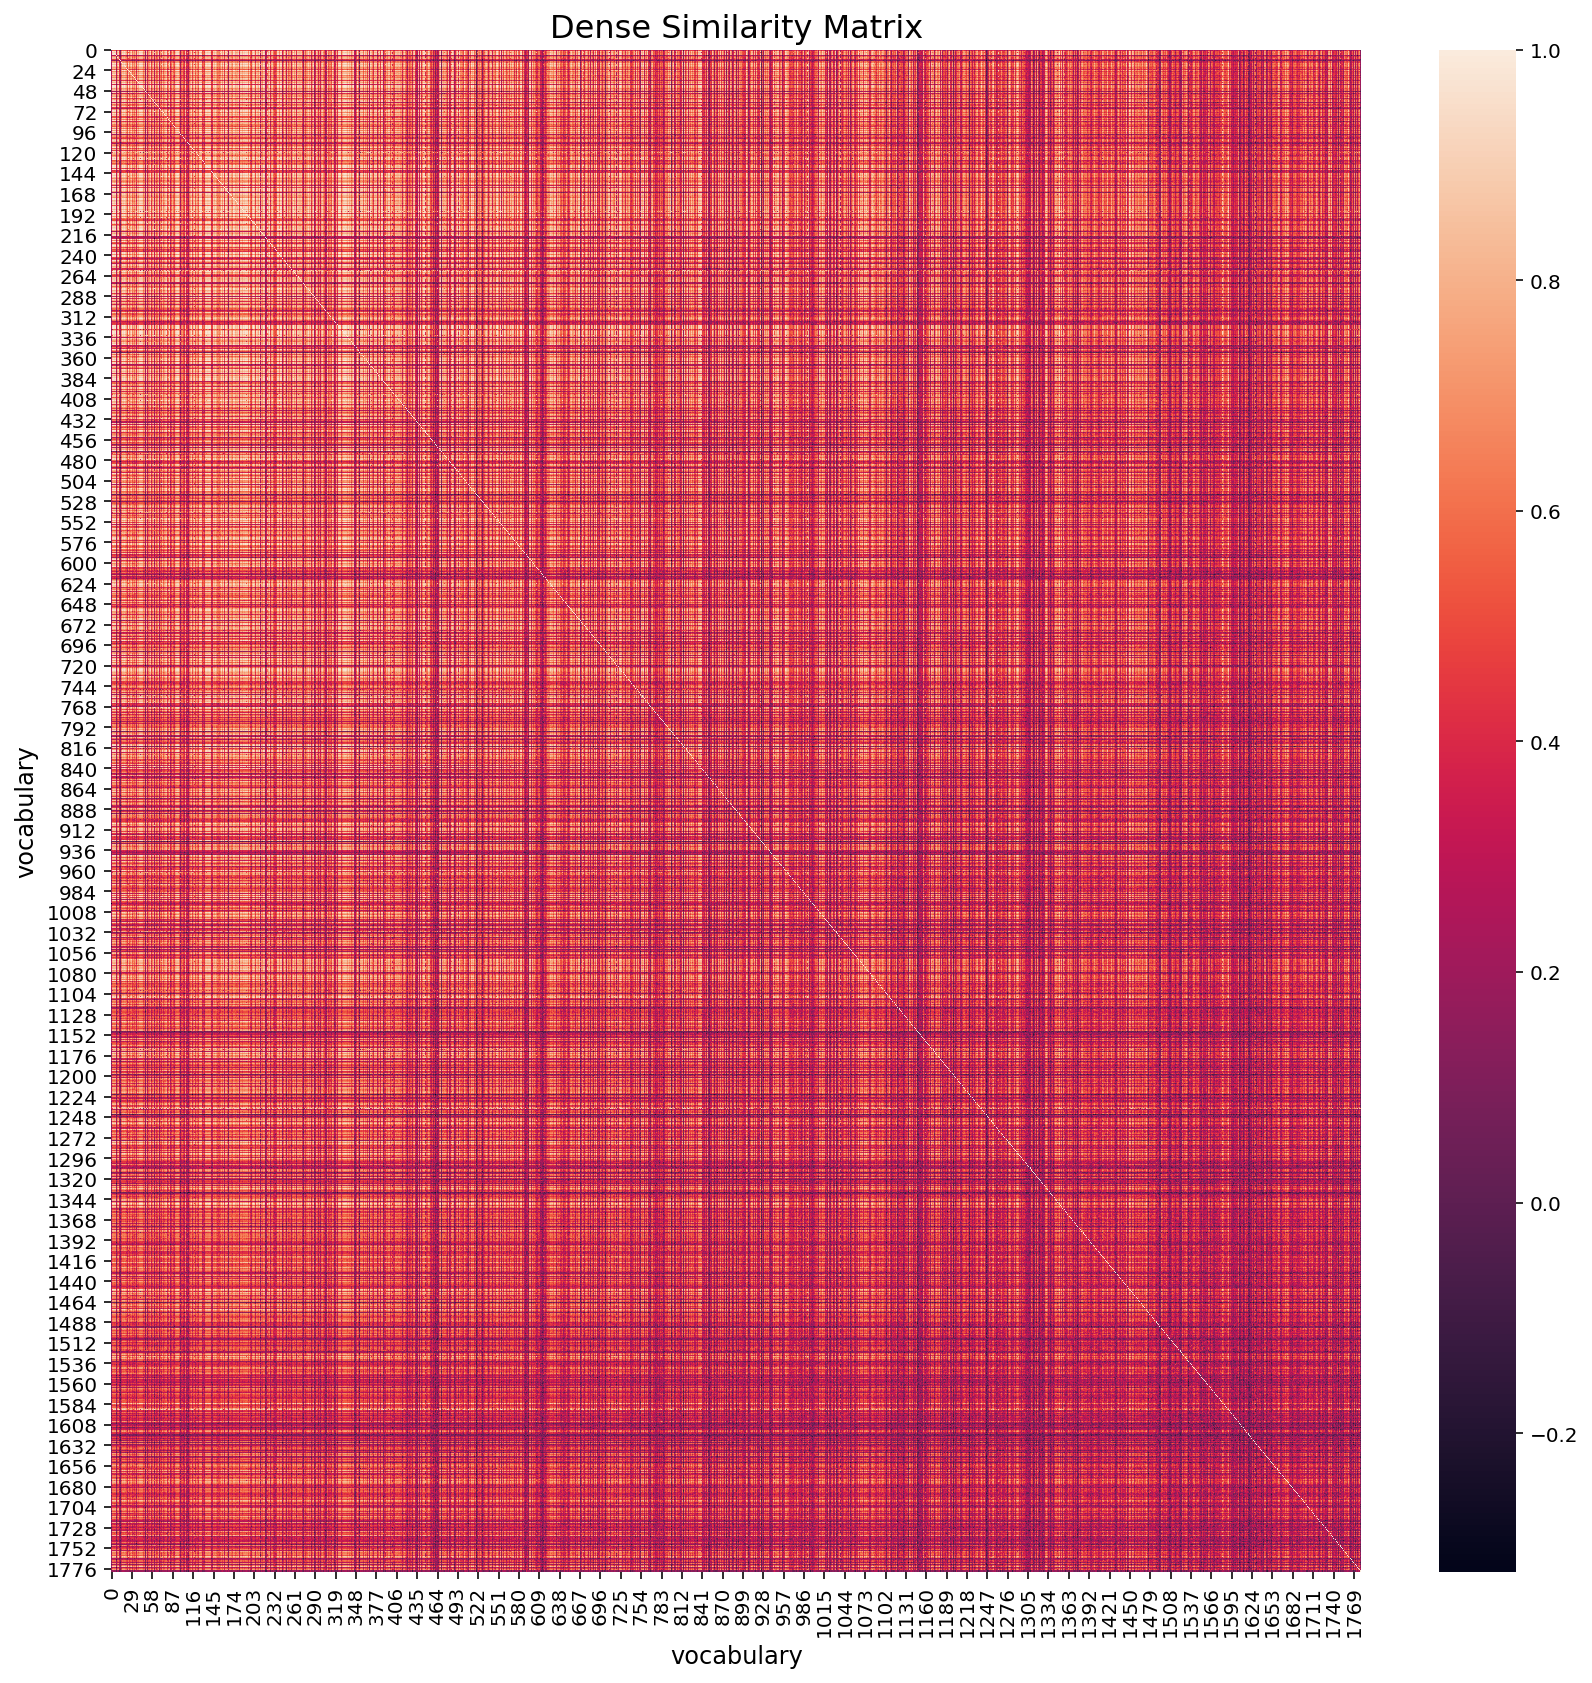

In [36]:
# Plot dense similarity matrix
fig, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(words_sim, ax = ax)
ax.set_title("Dense Similarity Matrix", fontsize=16)
ax.set_xlabel("vocabulary", fontsize=12)
ax.set_ylabel("vocabulary", fontsize=12)
plt.show()

In [37]:
# Exporting dense word similarity matrix
file_path = "../data/network/dense_similarity.csv"
df_dense.to_csv(file_path, index = False, sep = ',')

### Sparse matrix

In [38]:
# Returns the sparse similarity between all the words in the document
def get_sparse_similarity(model, precision=3, top_n=10):
    matrix = []
    vocabulary = list(model.wv.vocab.keys())
    n_words = len(vocabulary)
    
    # Calculate sparse similarity
    for word in vocabulary:
        row_sim = np.zeros(n_words)
        best_sim = w2v_model.wv.most_similar(positive = [word], topn = top_n)
        
        for neighbor in best_sim:
            nei_name = neighbor[0]
            nei_ix = vocabulary.index(nei_name)
            nei_sim = round(neighbor[1], precision)
            row_sim[nei_ix] = nei_sim
        
        matrix.append(row_sim)
    
    return matrix, vocabulary

In [39]:
# Create a data frame with the similarity between the nearest words
start_time = timeit.default_timer()
words_sim, vocabulary = get_sparse_similarity(w2v_model, 2, 50)
elapsed = timeit.default_timer() - start_time
elapsed

1.549494700000011

In [40]:
# Show sparse similarity matrix as a dataframe
df_sparse = pd.DataFrame.from_records(words_sim, columns=vocabulary)
print(df_sparse.shape)
df_sparse.iloc[:18, :18]

(1780, 1780)


gutenberg  adventures  sherlock  holmes  arthur   use  away  date  \
0         0.0         0.0      0.00    0.00    0.00  0.00  0.00   0.0   
1         0.0         0.0      0.00    0.00    0.00  0.56  0.00   0.0   
2         0.0         0.0      0.00    0.96    0.00  0.00  0.97   0.0   
3         0.0         0.0      0.00    0.00    0.00  0.00  0.99   0.0   
4         0.0         0.0      0.00    0.90    0.00  0.00  0.90   0.0   
5         0.0         0.0      0.00    0.95    0.00  0.00  0.94   0.0   
6         0.0         0.0      0.00    0.99    0.00  0.00  0.00   0.0   
7         0.0         0.0      0.00    0.00    0.35  0.00  0.00   0.0   
8         0.0         0.0      0.00    0.72    0.00  0.00  0.00   0.0   
9         0.0         0.0      0.00    0.84    0.00  0.00  0.85   0.0   
10        0.0         0.0      0.00    0.98    0.00  0.00  0.97   0.0   
11        0.0         0.0      0.00    0.85    0.00  0.00  0.85   0.0   
12        0.0         0.0      0.00    0.00    0.00  0.48  0.00   0.0   
13        0.0         0.0      0.00    0.00    0.00  0.00  0.00   0.0   
14        0.0         0.0      0.00    0.00    0.00  0.00  0.71   0.0   
15        0.0         0.0      0.77    0.00    0.00  0.00  0.00   0.0   
16        0.0         0.0      0.00    0.98    0.00  0.00  0.98   0.0   
17        0.0         0.0      0.00    0.92    0.00  0.00  0.92   0.0   

    english  character   set  start  cover  contents  scandal  bohemia   red  \
0       0.0        0.0  0.00    0.0    0.0       0.0     0.35     0.00  0.00   
1       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
2       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.96   
3       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
4       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
5       0.0        0.0  0.94    0.0    0.0       0.0     0.00     0.00  0.00   
6       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
7       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
8       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
9       0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
10      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
11      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
12      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
13      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.27  0.00   
14      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
15      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
16      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.00   
17      0.0        0.0  0.00    0.0    0.0       0.0     0.00     0.00  0.92   

    headed  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  
6      0.0  
7      0.0  
8      0.0  
9      0.0  
10     0.0  
11     0.0  
12     0.0  
13     0.0  
14     0.0  
15     0.0  
16     0.0  
17     0.0

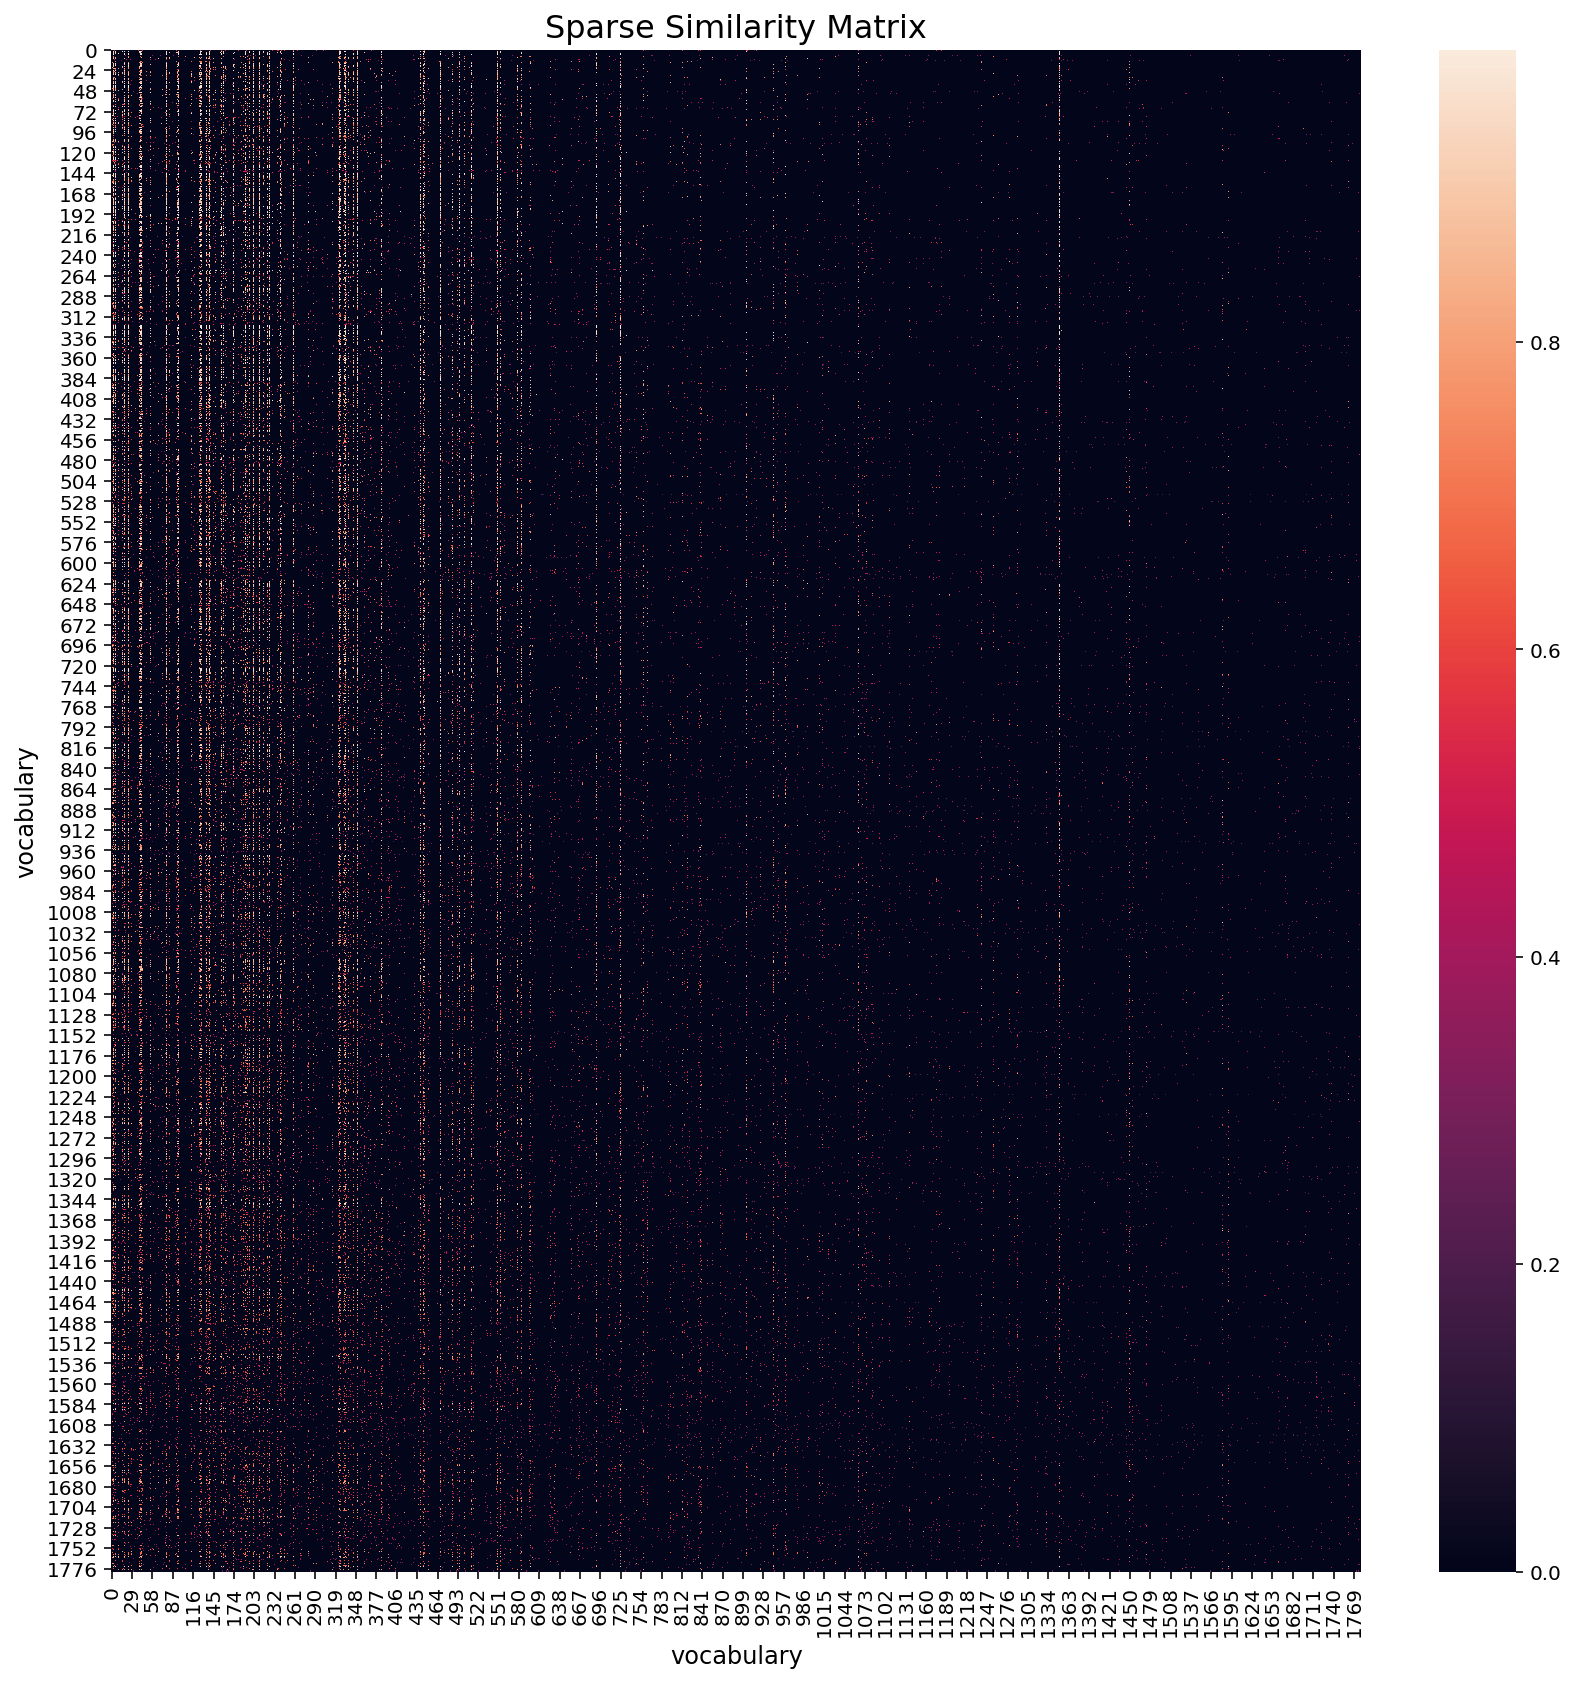

In [41]:
# Plot sparse similarity matrix
fig, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(words_sim, ax = ax)
ax.set_title("Sparse Similarity Matrix", fontsize=16)
ax.set_xlabel("vocabulary", fontsize=12)
ax.set_ylabel("vocabulary", fontsize=12)
plt.show()

In [42]:
# Exporting sparse word similarity matrix
file_path = "../data/network/sparse_similarity.csv"
df_sparse.to_csv(file_path, index=False, sep=',')

## Reference

<a name='link_one' href='https://en.wikipedia.org/wiki/Word_embedding' target='_blank' >[1]</a> Wikipedia - Word Embedding.  
<a name='link_two' href='https://pypi.org/project/gensim/' target='_blank' >[2]</a> Pypi - Gensim project site.  
<a name='link_three' href='https://en.wikipedia.org/wiki/Word2vec' target='_blank'>[3]</a> Wikipedia - Word2Vect.  

<hr>
<p><a href="https://ansegura7.github.io/NLP/">« Home</a></p>